Mu, Y., Zhang, Q., Hu, M., Wang, W., Ding, M., Jin, J., ... & Luo, P. (2024). [EmbodiedGPT: Vision-Language Pre-Training via Embodied Chain of Thought](https://proceedings.neurips.cc/paper_files/paper/2023/file/4ec43957eda1126ad4887995d05fae3b-Paper-Conference.pdf). Advances in Neural Information Processing Systems, 36.

**Abstract**
<!-- Embodied AI is a crucial frontier in robotics, capable of planning and executing action sequences for robots to accomplish long-horizon tasks in physical environments. In this work, we introduce EmbodiedGPT, an end-to-end multi-modal foundation model for embodied AI, empowering embodied agents with multi-modal understanding and execution capabilities. To achieve this, we have made the following efforts: (i) We craft a large-scale embodied planning dataset, termed EgoCOT. The dataset consists of carefully selected videos from the Ego4D dataset, along with corresponding high-quality language instructions. Specifically, we generate a sequence of sub-goals with the "Chain of Thoughts" mode for effective embodied planning. (ii) We introduce an efficient training approach to EmbodiedGPT for high-quality plan generation, by adapting a 7B large language model (LLM) to the EgoCOT dataset via prefix tuning. (iii) We introduce a paradigm for extracting task-related features from LLM-generated planning queries to form a closed loop between high-level planning and low-level control. Extensive experiments show the effectiveness of EmbodiedGPT on embodied tasks, including embodied planning, embodied control, visual captioning, and visual question answering. Notably, EmbodiedGPT significantly enhances the success rate of the embodied control task by extracting more effective features. It has achieved a remarkable 1.6 times increase in success rate on the Franka Kitchen benchmark and a 1.3 times increase on the Meta-World benchmark, compared to the BLIP-2 baseline fine-tuned with the Ego4D dataset. More demos, code, and dataset information can be found at our [homepage](https://embodiedgpt.github.io/). -->
具身AI是机器人技术的一个重要前沿, 能够为机器人规划和执行动作序列, 以在物理环境中完成长时域任务。在这项工作中, 我们引入 EmbodiedGPT, 一种用于具身AI的端到端多模态基础模型, 赋予具身智能体多模态理解和执行能力。为实现这一目标, 我们做了以下努力: (i) 我们制作了一个大规模的具身规划数据集, 命名为 EgoCOT。该数据集由 Ego4D 数据集中精心挑选的视频以及相应的高质量语言指令组成。具体来说, 我们使用"思想链"模式生成一系列子目标, 用于有效的具身规划。(ii) 我们引入了一种高效的 EmbodiedGPT 训练方法, 通过前缀调整将 7B 大语言模型 (LLM) 适应 EgoCOT 数据集, 用于高质量的规划生成。(iii) 我们引入了一种从LLM生成的规划查询中提取任务相关特征的范例, 以形成上层规划和下层控制之间的闭环。大量实验证明 EmbodiedGPT 在具身任务上的有效性, 包括具身规划、具身控制、视觉字幕和视觉问答。值得注意的是, EmbodiedGPT 通过提取更有效的特征, 显着提高了具身控制任务的成功率。与使用 Ego4D 数据集微调的 BLIP-2 基线相比, 它在 Franka Kitchen 基准测试中的成功率显着提高了 1.6 倍, 在 Meta-World 基准测试中成功率提高了 1.3 倍。更多演示、代码和数据集信息可以在我们的[主页](https://embodiedgpt.github.io/)找到。

# Introduction
<!-- Embodied AI tasks, e.g., embodied planning, embodied VQA, and embodied control, aim to imbue robots with the ability to perceive, reason, and act within their environment, enabling them to perform long-horizon plans and execute actions autonomously based on real-time observations. Recently, large language models (LLMs) such as GPT4 [1] and PaLM-E [2], have shown promising language understanding, reasoning, and "chain-of-thought" capabilities. Such advances may open new possibilities for developing robots capable of processing natural language instructions, performing multi-modal "chain-of-thought", and planning actions in physical environments. -->
具身人工智能任务, 例如具身规划、具身VQA和具身控制, 旨在激发机器人在其环境中感知、推理和行动的能力, 使它们能够基于实时观察, 自主执行长时域规划和动作。最近, 诸如 GPT4 [1] 和 PaLM-E [2] 之类的大语言模型 (LLMs) 已展现出有前景的语言理解、推理和"思维链"能力。这些进步可能为开发(能够处理自然语言指令、执行多模态"思维链"以及在物理环境中规划动作的)机器人开辟新的可能性。

<!-- Large-scale datasets play important roles in training large language models. For example, OpenCLIP trains its ViT-G/14 model on the LAION-2B dataset [3], which contains 2B image-language pairs. Unlike general-purpose visual language tasks that can get a huge amount of weakly labeled image-caption pairs from the Internet, embodied AI tasks require egocentric data in robotics domains. Also structured language instructions are needed for precise planning, which usually requires huge manual efforts and costs. This poses a challenging problem in collecting high-quality embodied multi-modal data. Some researchers [4, 5, 6, 7] explore creating large-scale embodied datasets with simulators, but a significant gap remains between simulation and the real world. Recent works [8, 9, 10] also explore adapting the pre-trained LLMs to a new domain by efficient tuning strategies like LoRA [11]. However, several open questions still remain: how to apply LLMs to the field of robotics which may face large domain gaps; how to leverage the "chain-of-thought" capability for structured planning; and how to use the output language plan for downstream manipulation tasks in an end-to-end manner. -->
大规模数据集在训练大语言模型中发挥着重要作用。例如, OpenCLIP 在 LAION-2B 数据集 [3] 上训练其 ViT-G/14 模型, 该数据集包含 2B 图像-语言对。与(可以从互联网获取大量弱标注的图像-标题对的)通用视觉语言任务不同, 具身人工智能任务需要机器人领域中的以自我为中心的数据。精确规划还需要结构化语言指令, 这通常需要大量的人工努力和成本。这给收集高质量的具身多模态数据提出了一个具有挑战性的问题。一些研究人员 [4, 5, 6, 7] 探索使用模拟器创建大规模的具身数据集, 但模拟与现实世界之间仍然存在巨大差距。最近的工作 [8, 9, 10] 还探索通过 LoRA [11] 等有效的调整策略, 将预训练的 LLMs 适用于新领域。然而, 仍然存在一些开放问题: 如何将 LLMs 应用到机器人领域, 这可能面临巨大的领域差距; 如何利用"思维链"能力进行结构化规划; 以及如何以端到端的方式使用输出语言规划, 用于下游操作任务。

<!-- To solve the above challenges, in this work, we first build a large-scale embodied planning dataset, termed EgoCOT, which features chain-of-thought planning instructions. It contains carefully selected egocentric videos from the Ego4D dataset [16] and corresponding high-quality step-by-step language instructions, which are machine-generated, then semantics-based filtered, and finally human-verified. Additionally, we also create the EgoVQA dataset as an extension of the Ego4D dataset, focusing on egocentric human-object interaction video question answering tasks, which aims to offer a wider range of egocentric multi-modal data. -->
为了解决上述挑战, 在这项工作中, 我们首先构建了一个大规模具身规划数据集, 命名为 EgoCOT, 它以思想链规划指令为特征。它包含从 Ego4D 数据集 [16] 中精心挑选的以自我为中心的视频, 以及相应的高质量分步语言指令, 这些<font color="red">指令由机器生成, 然后基于语义过滤, 最后人工验证</font>。此外, 我们还创建了 EgoVQA 数据集作为 Ego4D 数据集的扩展, 专注于以自我为中心的人机交互视频问答任务, 旨在提供更广泛的以自我为中心的多模态数据。

<!-- Based on our EgoCOT and EgoVQA, we present an end-to-end multi-modal embodied foundation model called EmbodiedGPT, which can interact with the physical world in a more natural and intuitive manner, and perform many embodied tasks, as shown in Figure 1, such as embodied planning, embodied VQA, and embodied control. EmbodiedGPT comprises four integrated modules that work together, including i) a frozen vision model for encoding visual features of current observations, ii) a frozen language model used to execute natural language for question answering, captioning, and embodied planning tasks, iii) an embodied-former with a language mapping layer for aligning the visual and embodied instructions and extracting task-relevant instance-level features (with the generated planning for low-level control), and iv) a policy network, which is responsible for producing low-level actions based on the task-relevant features, enabling the agent to effectively interact with the environment. To further enhance EmbodiedGPT's performance in generating reliable planning containing sub-goal sequences, we implement prefix tuning on the frozen language model to encourage the generation of more executable planning. -->
基于我们的 EgoCOT 和 EgoVQA, 我们提出了一种端到端多模态具身基础模型 EmbodiedGPT, 它可以以更自然和直观的方式与物理世界交互, 并执行许多具身任务, 如[图1](#fig.1)所示, 例如具身规划、具身VQA、具身控制。<font color="red">EmbodiedGPT 由四个(协同工作的集成的)模块组成, 包括: 1) 一个冻结的视觉模型, 用于编码当前观察的视觉特征, 2) 一个冻结的语言模型, 执行自然语言进行问答、字幕和具身规划任务, 3) 一个带语言映射层的 embodied-former, 用于对齐视觉和具身指令, 并提取与任务相关的实例级特征, 4) 一个策略网络, 负责根据任务相关特征生成下层动作, 使智能体能够与环境有效地交互</font>。为了进一步增强 EmbodiedGPT 在生成(包含子目标序列的)可靠规划方面的表现, 我们在冻结的语言模型上实施前缀调整, 以鼓励生成更具可执行性的规划。

<!-- Our method possesses the following core advantages: i) the generated planning exhibits strong executability and granularity at the object part level, such as the gripper of a robotic arm or the handle of a door, manifested in sub-goal sequences. ii) the proposed EgoCOT dataset is built based on an open-source large-scale dataset, which offers greater scalability compared to the PaLM-E [2] model trained on proprietary robot data. And both the EgoCOT dataset, and the EmbodiedGPT model will be open-sourced. iii) EmbodiedGPT forms a closed-loop from high-level planning to low-level control, which enables seamless integration of high-level planning and low-level control, providing efficient task performance and adaptability to a wide range of tasks. To achieve this, we utilize the embodied-former to query task-relevant instance-level features through cross-attention between visual observations and generated embodied planning. This enables the policy network to complete low-level control tasks with fewer than 25 demonstrations. -->
我们的方法具有以下核心优势: 1) 生成的规划在对象部分级别展现出强大的可执行性和精细度, 例如机械臂的抓手或门把手, 体现在子目标序列中。2) 所提出的 EgoCOT 数据集是基于开源大规模数据集构建的, 与在机器人专用数据上训练的 PaLM-E [2] 模型相比, 它提供更多的可扩展性。EgoCOT 数据集和 EmbodiedGPT 模型都将开源。3) EmbodiedGPT 形成了从上层规划到下层控制的闭环, 实现上层规划和下层控制的无缝集成, 提供高效的任务性能和(对广泛任务的)适应性。为了实现这一目标, 我们<font color="red">利用embodied-former, 通过视觉观察和生成的具身规划之间的交叉注意力, 查询与任务相关的实例级特征</font>。这使得策略网络能够以少于 25 次的演示来完成下层控制任务。

<!-- The contributions can be summarized as follows: (i) We build an end-to-end multi-modal foundation model EmbodiedGPT for embodied AI, which is featured with "chain-of-thought" capability, empowering embodied agents to interact with the physical world in a more natural and intuitive manner. (ii) We develop two datasets, EgoCOT and EgoVQA, consisting of 200M annotated videos from the Ego4D dataset with corresponding detailed planning instructions and VQA data. The datasets are first machine-generated, then semantics-based filtered, and finally human-verified for quality control. (iii) We introduce EmbodiedGPT a cost-effective training approach and a paradigm for extracting task-relevant features from LLM-generated planning queries, thereby forming a closed loop between high-level planning and low-level control. We demonstrate our approach's effectiveness by achieving state-of-the-art or comparable performance on multiple embodied tasks, including embodied control, embodied planning, video captioning, and video QA. Notably, in comparison to BLIP-2 [17] fine-tuned on the Ego4D dataset and R3M [12] specifically designed for manipulation tasks, EmbodiedGPT outperforms both models on the Franka Kitchen [14] benchmark with a margin of 22.1% and 5.5%, respectively. Similarly, on the Meta-World [14] benchmark, EmbodiedGPT surpasses both models with margins of 22.5% and 4.2%, respectively. -->
本文贡献可总结如下: 1) 我们为具身人工智能构建了一个端到端的多模态基础模型 EmbodiedGPT, 该模型具有"思想链"能力, 使具身智能体能够以更自然、直观的方式与物理世界交互。2) 我们开发了两个数据集, EgoCOT 和 EgoVQA, 由来自 Ego4D 数据集的 2 亿个带标注的视频以及相应的详细规划指令和 VQA 数据组成。数据集首先由机器生成, 然后基于语义过滤, 最后人工验证, 用于质量控制。3) 我们引入 EmbodiedGPT 一种经济高效的训练方法和</font>(从 LLM 生成的规划查询中)提取任务相关特征的范式, 从而在上层规划和下层控制之间形成闭环</font>。我们通过在多个具身任务(包括具身控制、具身规划、视频字幕和视频问答)上, 实现最先进的或者可比的性能, 证明我们的方法的有效性。值得注意的是, 与在 Ego4D 数据集上微调的 BLIP-2 [17] 和专为操作任务设计的 R3M [12] 相比, EmbodiedGPT 在 Franka Kitchen [14] 基准测试上, 分别以 22.1% 和 5.5% 的优势优于这两个模型。同样, 在 Meta-World [14] 基准测试上, EmbodiedGPT 分别以 22.5% 和 4.2% 的优势超越了这两个模型。

# Related Work
## Vision Language Pre-training with large scale foundation model
<!-- Vision-Language Pre-training focuses on strengthening the link between visual observation and natural language. The goal is to develop models that can better understand and process visual content, such as recognizing objects and actions, and generating descriptive text. As models become larger, the computational expense for end-to-end pre-training rises, leading to the need for modular vision-language pre-training methods. These methods smartly use pre-trained models, keeping them 'frozen' during vision language pre-training to save on computational costs. For example, models like Uniter [18], Oscar [19], VinVL [20], and LiT [21] freeze the image encoder, while Frozen [22] and VGPT [23] freeze the language model. Furthermore, Flamingo [24] and BLIP-2 [17] use both frozen image encoders and language models, providing a balance between performance and computational efficiency. Due to the lack of open-source data for multi-modal embodied planning, previous works struggled to perform detailed task decomposition and lacked the ability to generate precise and executable plans. To tackle this issue, we create the EgoCOT dataset and develop an embodied chain-of-thought vision language pre-training framework to enhance the capacity of multi-modal models for embodied reasoning and planning. -->
视觉语言预训练聚焦于加强视觉观察和自然语言之间的联系。目标是开发能够更好地理解和处理视觉内容的模型, 例如识别对象和动作, 以及生成描述性文本。随着模型变得越来越大, 端到端预训练的计算费用不断增加, 从而需要模块化的视觉语言预训练方法。这些方法巧妙地使用预训练的模型, 在视觉语言预训练期间保持它们"冻结", 以节省计算成本。例如, Uniter [18]、Oscar [19]、VinVL [20] 和 LiT [21] 等模型冻结图像编码器, 而 Frozen [22] 和 VGPT [23] 冻结语言模型。此外, <font color="red">Flamingo [24] 和 BLIP-2 [17] 同时使用冻结图像编码器和语言模型, 在性能和计算效率之间提供平衡</font>。由于缺乏多模态具身规划的开源数据, 之前的工作难以执行详细的任务分解, 并且缺乏(生成精确且可执行的规划的)能力。为了解决这个问题, 我们创建了 EgoCOT 数据集, 并开发了一个具身思想链视觉语言预训练框架, 以增强多模态模型的能力, 用于具身推理和规划。

## Egocentric Video Datasets
<!-- Egocentric videos, which are captured using wearable cameras, provide a natural perspective of daily activities and pose several challenging research questions [25, 26, 27]. Several egocentric video datasets have been created over the years, including [28, 29, 30]. However, the collection of egocentric videos is expensive, and previous datasets tend to be small-scale and domain-specific. Recently, a massive egocentric video dataset, Ego4D [16], has been released and has been used for embodied representation learning. The dataset comprises 3,670 hours of videos collected by 931 people from 74 locations across 9 countries, with videos accompanied by narrations. For embodied AI tasks, learning from large and diverse egocentric human videos has emerged as a promising approach to acquiring a generally useful visual representation for controlling such tasks. For example, R3M [12] developed a sparse and compact visual representation using the Ego4D human video dataset through a combination of time-contrastive learning and video-language alignment. VIP [31], learns general-purpose reward functions for goal-conditioned robotic manipulation using the Ego4D dataset. -->
使用可穿戴相机拍摄的以自我为中心的视频提供了日常活动的自然视角, 并提出了一些具有挑战性的研究问题[25, 26, 27]。多年来多个以自我为中心的视频数据集已被创建, 包括[28, 29, 30]。然而, 以自我为中心的视频的收集非常昂贵, 而且以前的数据集往往是小规模的且特定领域的。最近, 一个大规模的以自我为中心的视频数据集 Ego4D [16] 已被发布, 并已用于具身表示学习。该数据集包含来自 9 个国家 74 个地区的 931 人收集的 3,670 小时的视频, 视频配有旁白。对于具身人工智能任务, 从大量且多样化的以自我为中心的人类视频中学习已成为一种有前途的方法, 以获取(用于控制此类任务的)普遍有用的视觉表示。例如, R3M [12] 通过时间对比学习和视频语言对齐的结合, 使用 Ego4D 人类视频数据集, 开发了稀疏而紧凑的视觉表示。VIP [31], 使用 Ego4D 数据集, 学习通用奖励函数, 用于目标条件机器人操作。

## Large Foundation Model Assistant System
<!-- Recent advancements in large-scale multi-modal language models (LLMs), such as GPT-3 [32] and GPT-4 [1], have resulted in the creation of various models that can understand multiple modes of information. Two main approaches are used in this field: systematic collaboration and end-to-end trained models. Systematic collaboration approaches involve coordinating multiple vision models or tools with language models to combine visual information with textual descriptions. Examples include models like Visual ChatGPT [33], MM-REACT [34], and HuggingGPT [35]. However, this approach is limited by the accuracy and capacity of fixed modular models, which can lead to an accumulation of errors. On the other hand, end-to-end models aim to provide unified models for multi-modal tasks. For example, Flamingo [24] combines vision and language by freezing pre-trained vision encoders and language models. BLIP-2 [13] introduces Q-Former to align visual features from frozen visual encoders with large language models. Recently, models such as MiniGPT-4 [36] and LLaVA [37] align instruction-tuned language models with visual features from frozen visual backbones. VideoChat[38], mPLUG-Owl [39] and X-LLM [40], further expand support for video input. PaLM-E [41] is the first large embodied multi-modal model, which directly incorporates features from sensor modalities to improve real-world performance and is trained with their large-scale everyday robot data [42]. Compared to PaLM-E, EmbodiedGPT is more compact, with a size of only 10B and offers additional support for video captioning, video QA and making planning according to a demonstration video. Furthermore, we form a closed-loop system that spans from high-level planning to low-level control. -->
大规模多模态语言模型(LLMs)的最新进展, 例如 GPT-3 [32] 和 GPT-4 [1], 导致各种(可以理解多种信息模式的)模型的发明。该领域使用两种主要方法: 系统协作和端到端训练的模型。系统协作方法涉及协调多个视觉模型或工具与语言模型, 以将视觉信息与文本描述结合。示例包括 Visual ChatGPT [33]、MM-REACT [34] 和 HuggingGPT [35] 等模型。然而, 这种方法受固定模块化模型的准确性和容量的限制, 这可能导致误差的累积。另一方面, 端到端模型旨在为多模态任务提供统一的模型。例如, Flamingo [24] 通过冻结预训练的视觉编码器和语言模型, 将视觉和语言结合。BLIP-2 [13] 引入 Q-Former, 将(冻结的视觉编码器的视觉特征)与(大语言模型)对齐。最近, MiniGPT-4 [36] 和 LLaVA [37] 等模型将(指令调整的语言模型)与(冻结的视觉 backbones 的视觉特征)对齐。VideoChat[38]、mPLUG-Owl[39]和X-LLM[40], 进一步扩大(对视频输入的)支持。PaLM-E [41] 是第一个大型具身多模态模型, 它直接融合传感器模态的特征, 提高现实世界的性能, 并使用大规模日常机器人数据进行训练[42]。与 PaLM-E 相比, EmbodiedGPT 更加紧凑, 大小仅为10B, 并提供(对视频字幕、视频QA和基于一个演示视频制定规划的)额外支持。此外, 我们形成了一个闭环系统, 该系统涵盖从上层规划到下层控制。

# Method
<!-- The goal of the embodied foundation model is to imitate human-like perception and interaction with the environment by accurately perceiving the environment, identifying relevant objects, analyzing their spatial relationships, and formulating a detailed task plan. To achieve this, the EmbodiedGPT employs a pre-trained vision transformer as the visual encoder and a pre-trained LLaMA [43] model as the language model. As shown in Figure 2, the embodied-former acts as a bridge between the visual and language domains, it first extracts compact visual features from the output of the vision model through attention-based interaction involving visual tokens, text queries, and learnable embodied queries and then maps it to the language modality through a language mapping layer. These embeddings are sent to the frozen LLaMA [43] language model for visual caption, visual QA, and embodied planning. The generated planning is then used to query highly relevant features from the general visual tokens encoded by the visual model via the embodied-former. These features are utilized to generate low-level control commands for task execution through the downstream policy network. To enhance performance across a range of embodied tasks, we introduce a novel video-language pre-training paradigm that leverages a cognitive chain of thought to produce embodied planning from egocentric video inputs. We formulate this task as a standard VQA (Visual Question Answering) task, using "how to do the task that + original caption" as the question and embodied planning as the answer. This framework enriches the data of embodied planning and standard visual QA tasks, encouraging the embodied-former to capture task-specific features that are more suitable for embodied control tasks. -->
具身基础模型的目标是通过准确地感知环境、识别相关对象、分析它们的空间关系并制定详细的任务规划, 模仿类人的感知和与环境的交互。为了实现这一目标, EmbodiedGPT 采用一个预训练的视觉 transformer 作为视觉编码器, 并采用一个预训练的 LLaMA [43] 模型作为语言模型。如[图2](#fig.2)所示, <font color="red">embodied-former 充当视觉和语言领域之间的桥梁, 它首先通过基于注意力的交互(涉及视觉词元、文本查询和可学习的具身查询), 从视觉模型的输出中提取紧凑的视觉特征, 然后通过语言映射层将其映射到语言模态</font>。这些嵌入被发送到冻结的 LLaMA [43] 语言模型, 用于视觉字幕、视觉 QA 和具身规划。然后, <font color="red">使用生成的规划, 通过 embodied-former, 从视觉模型编码的一般视觉词元中, 查询高度相关的特征</font>。这些特征用于生成下层控制命令, 通过下游策略网络, 用于任务执行。为了增强一系列具身任务的性能, 我们引入一种新颖的视频语言预训练范式, 该范式利用认知思维链, 从以自我为中心的视频输入中生成具身规划。我们将此任务制定为标准的 VQA (视觉问答)任务, 用"如何完成该任务+原始标题"作为问题, 用具身规划作为答案。该框架丰富了具身规划和标准视觉 QA 任务的数据, 激励 embodied-former 捕获(更适合具身控制任务的)任务专用特征。

<span id='fig.2'></span>
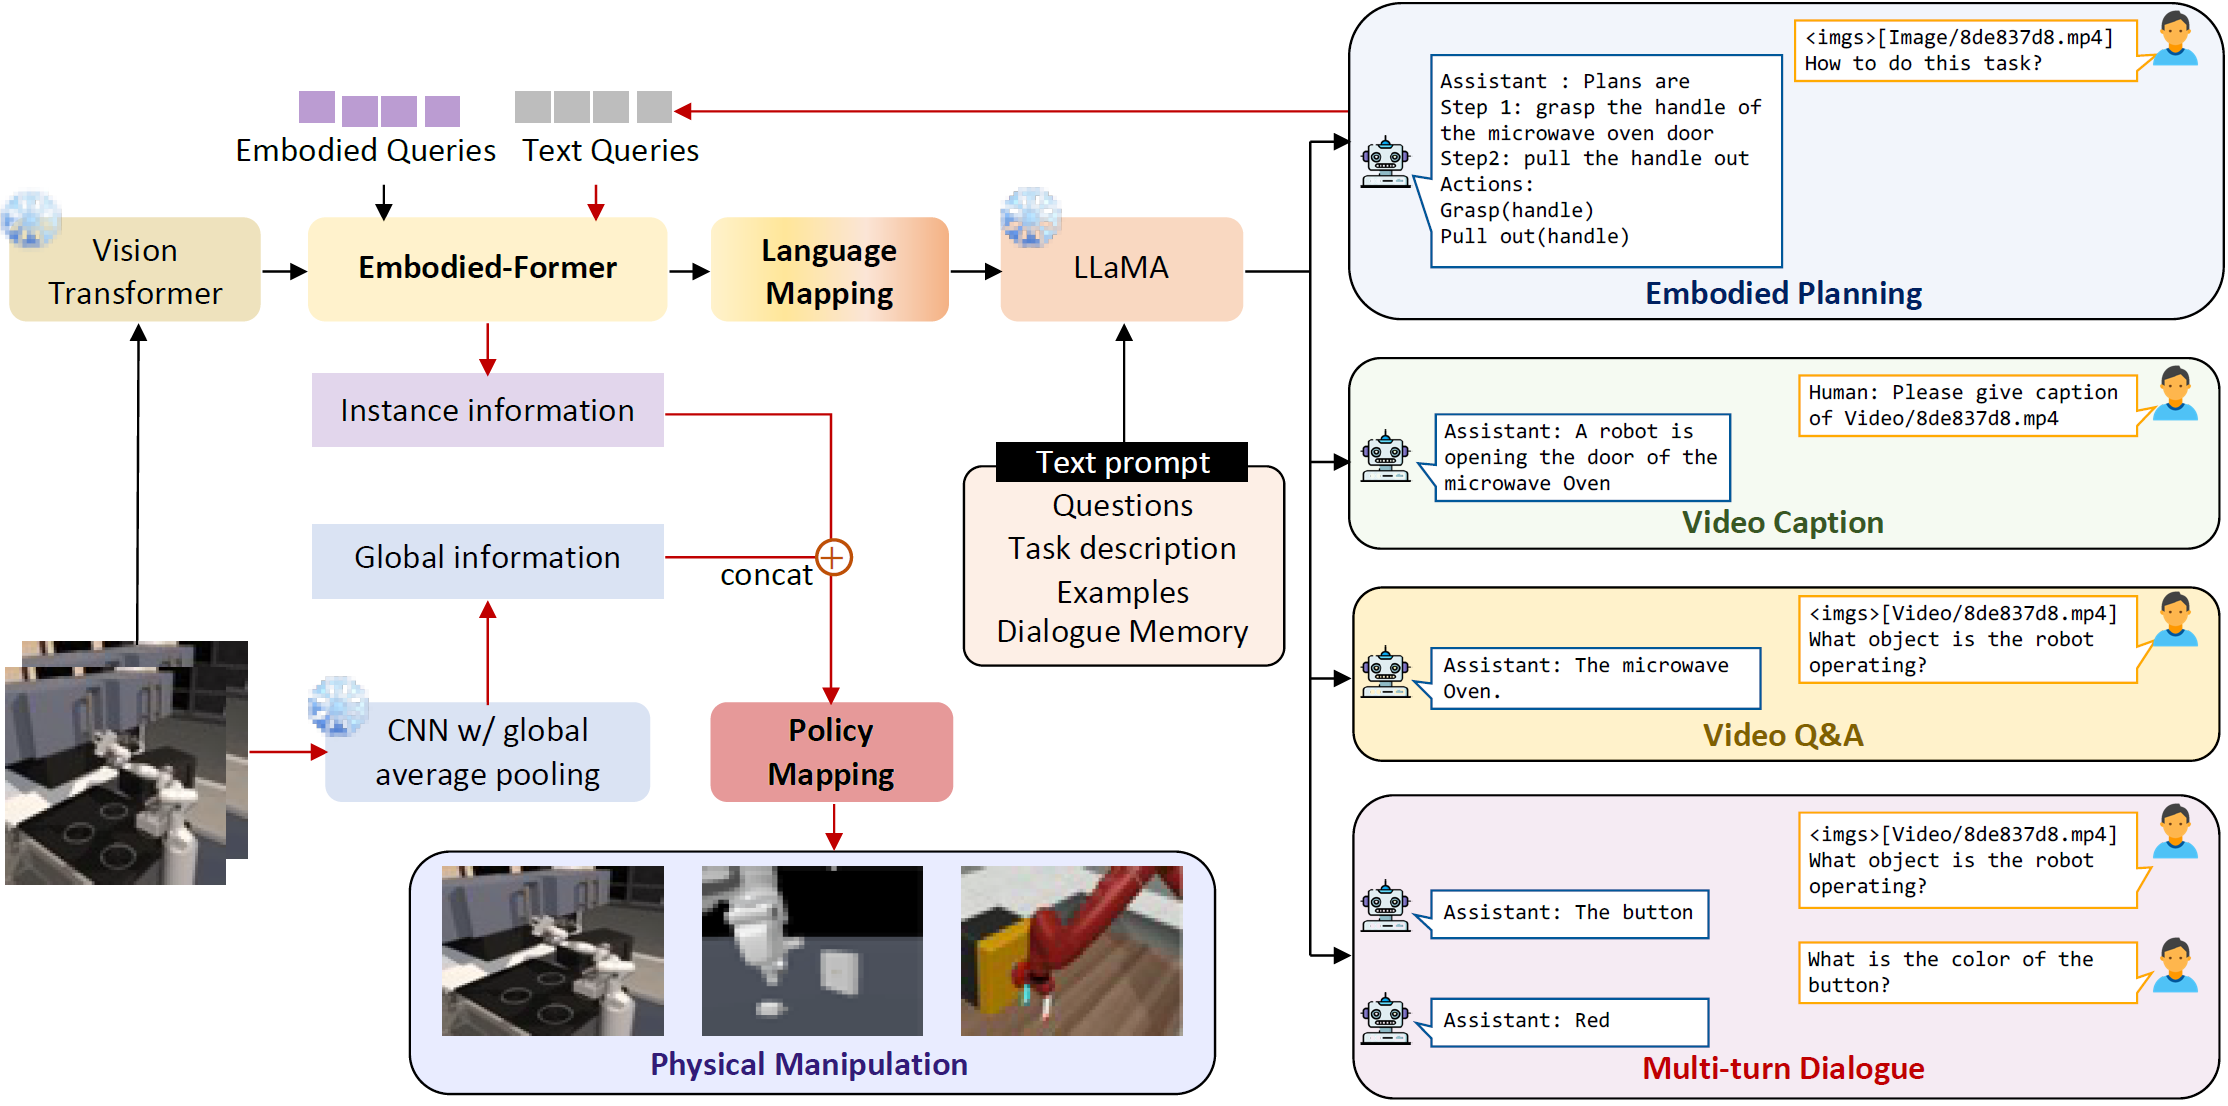
<!-- Figure 2: Overall framework of EmbodiedGPT. The black arrow shows the vision-language planning process, while the red arrow represents that we leverage the queried language plans for better policy learning in low-level control tasks. -->
图2: EmbodiedGPT 总体框架。**黑色箭头**表示**视觉语言规划过程**, 而<font color="red">红色箭头</font>表示我们<font color="red">利用查询到的语言规划, 在下层控制任务中更好地进行策略学习</font>。

## Framework
<!-- The training process consists of three stages, each designed to incrementally develop reasoning and planning capabilities. The first two stages focus on pre-training in basic cognitive and responsive skills, while the third stage involves training the embodied AI task with egocentric video-text data on EgoCOT. In the first stage, we focus on image-text conversation alignment pre-training, which involves using three datasets: COCO Caption [44], 595 thousand finely filtered image-text pairs from CC3M [45], and 491 thousand filtered image-text pairs obtained by re-captioning LAION-400M using BLIP-2 [17]. The primary goal of this stage is to pre-train the Embodied-former and language projection while keeping the vision and language model parameters frozen to save computational resources. In the second stage, our goal is to enhance the model's ability to comprehend and generate more complex sentences and improve its reasoning skills. We achieve this by updating the language projection and prefix language adapter and utilizing the "Complex_Reasoning_77k" and multi-turn conversation datasets provided by "LLaVA_Instruct_150K" [46]. -->
训练过程包含三个阶段, 每个阶段旨在逐步开发推理和规划能力。前两个阶段聚焦基本认知和响应技能的预训练, 而第三阶段涉及在 EgoCOT 上, 使用以自我为中心的视频-文本数据, 训练具身 AI 任务。在<u>*第一阶段*</u>, 我们<font color="red">聚焦图像-文本对话对齐预训练</font>, 其中涉及使用三个数据集: COCO Caption [44]、来自 CC3M [45] 的 595,000 个精心过滤后的图像-文本对, 以及(使用 BLIP-2 对 LAION-400M 重新添加字幕获得的) 491,000 个过滤后的图像文本对[17]。此阶段的**主要目标**是<font color="red">预训练 embodied-former 和语言投影, 同时保持视觉和语言模型参数冻结</font>, 以节省计算资源。在<u>*第二阶段*</u>, 我们的**目标**是<font color="blue">增强模型理解和生成更复杂句子的能力, 提高其推理能力</font>。我们通过<font color="red">更新语言投影和前缀语言适配器</font>, 并利用"Complex_Reasoning_77k"和"LLaVA_Instruct_150K"提供的多轮对话数据集, 实现这一点[46]。

<!-- **Embodied "chain-of-thought" training with EgoCOT**: During the third stage, we employ Conv3D [47] to adapt the pre-trained vision model from stage 2 for video encoding, using a total of eight evenly distributed keyframes from each video. Each keyframe is partitioned into three-dimensional (3D) patches, which can be visualized as spatio-temporal cubes, adeptly capturing both the visual content and the sequence of events within the video. These 3D patches are subsequently encoded into visual tokens via the Conv3D module with a time offset of 2 and are then integrated into the internal vision transformer. Then, we introduce the 'chain-of-thought' vision language pre-training paradigm where the model takes 8 keyframes of the video as input, along with the task description, embodied planning, and structured verb-noun pairs summary to reason with a prompt, such as Listing 1. To avoid overfitting, we provide a prompt set that has different instructions with the same meaning. In this stage, we fine-tune the patch embedding, the language projection layer, and the prefix language adapter to better capture temporal information. -->
**使用 EgoCOT 的具身"思想链"训练**: 在<u>*第三阶段*</u>, 我们<font color="red">采用 Conv3D [47] 调整第二阶段的预训练视觉模型用于视频编码</font>, 使用每个视频中总共 8 个均匀分布的关键帧。每个关键帧被划分为三维 (3D) 块，这些块能够可视化为时空立方体, 从而<font color="blue">熟练地捕获视频中的视觉内容和事件序列</font>。这些 <font color="red">3D 块随后通过 Conv3D 模块编码进视觉词元, 时间偏移为 2, 然后它们被集成到内部视觉 transformer 中</font>。然后, 我们<font color="red">引入"思想链"视觉语言预训练范式, 其中模型将视频的 8 个关键帧作为输入, 并将任务描述、具身规划和结构化动名词对用一个提示概括, 以进行推理</font>, 如[Listing 1](#Listing.1)。为了避免过度拟合, 我们提供了一个提示集合, 该集合具有相同含义的不同指令。在这个阶段, 我们<font color="red">对块嵌入、语言投影层和前缀语言适配器进行微调</font>, <font color="blue">以更好地捕获时间信息</font>。

<span id='Listing.1'></span>
<code>
Watch this video , identify the actions and devise a plan using chain -of - thought . 
    Extract detailed actions using this schema :
Task : {" task description " }
Plan : {" plan with chain -of - thought "} Actions : {{ " number " }: { ’ verb ’ }({ ’ noun ’}) }.
</code>
<!-- Listing 1: Prompt we used for chain-of-thought pre-training. -->
Listing 1: 我们用于思维链预训练的提示。

## Model Architecture
<!-- The Embodied-former, denoted as $\varepsilon(\cdot)$, serves as a bridge between visual input $x_\text{vis}$ and the frozen language model, acting as an information bottleneck that delivers the most relevant visual data to the language model. The Embodied-former consists of two sub-modules: one for extracting features from the image input, denoted as $\varepsilon_\text{vis} : x_\text{vis} \to y_\text{vis}$, and another for extracting features from the text input, denoted as $\varepsilon_\text{txt} : x_\text{txt} \to y_\text{txt}$. We employ $N$ learnable embodied query embeddings $y_\text{query}$ as the input of $\varepsilon$ to interact with $x_\text{vis}$ through cross-attention layers and with $x_\text{txt}$ through self-attention layers. We denote the output query representation as $z \in \mathbb{R}^{N \times D}$, where $D$ is the dimensionality of the embeddings. The dimension of $z$ is significantly smaller than that of the visual features. The output query embeddings are then transformed to $z^{'} \in \mathbb{R}^{N \times D^{'}}$, which have the same dimensionality $D^{'}$ as the LLM's text embedding in the language modality. This transformation is performed by a mapping function denoted as $M : z \to z^{'}$, which is accomplished by a linear projection via a fully-connected (FC) layer. The projected embeddings, $z^{'}$, serve as "soft visual prompts for the language model", decoupling the whole interaction into visual-query interaction and query-text interaction. The final embodied planning is inferred by the language model with $z^{'}$ and text prompt(shown as Listing 1) as input. For low-level control which aims to generate actions to interact with the environment, the embodied plan $x_\text{plan}$ is used as input text for embodied-former to query the task-relevant instance level features $z_\text{instance} = \varepsilon \left( x_\text{vis}, x_\text{plan}, y_\text{query} \right)$. Subsequently, the agent is capable of generating control commands, such as the turning angle of the servo, represented as $a = g \left( z_\text{instance}, z_\text{global} \right)$. This function combines both the instance-specific information $z_\text{instance}$ and the global context $z_\text{global}$. The global context is inferred using a ResNet50 model [48] that has been pre-trained on ImageNet [49], employing global average pooling. Here, $g(\cdot)$ represents the policy network, which is a Multi-Layer Perceptron (MLP) [50] mapping function. The output of the policy network consists of specific executable actions, such as positions and velocities in the Cartesian coordinate system. More implementation details can be found in Appendix A. -->
Embodied-former, 记为 $\varepsilon(\cdot)$, 作为视觉输入 $x_\text{vis}$ 和冻结语言模型之间的桥梁, 充当信息瓶颈, 将最相关的视觉数据传递给语言模型。Embodied-former 包含**两个子模块**: 一个用于<font color="red">从图像输入中提取特征</font>, 记为 $\varepsilon_\text{vis} : x_\text{vis} \to y_\text{vis}$, 另一个用于<font color="red">从文本输入中提取特征</font>, 记为 $\varepsilon_\text{txt} : x_\text{txt} \to y_\text{txt}$。我们<font color="red">采用 $N$ 个可学习的具身查询嵌入 $y_\text{query}$ 作为 $\varepsilon$ 的输入, 通过交叉注意力层与 $x_\text{vis}$ 交互, 通过自注意力层与 $x_\text{txt}$ 交互</font>。我们将输出查询表示记为 $z \in \mathbb{R}^{N \times D}$, 其中 $D$ 是嵌入的维度。$z$ 的维度明显小于视觉特征的维度。然后<font color="red">将输出查询嵌入转换为 $z^{'} \in \mathbb{R}^{N \times D^{'}}$</font>, 其具有(与语言模态中 LLM 的文本嵌入相同的)维度 $D^{'}$。<font color="red">此转换由映射函数(记为$M : z \to z^{'}$)执行, 该函数通过全连接 (FC) 层, 完成线性投影</font>。<font color="blue">投影的嵌入</font> $z^{'}$ 作为"语言模型的软视觉提示", <font color="blue">将整个交互解耦为视觉查询交互和查询文本交互</font>。<font color="red">最终</font>的具身规划<font color="red">由语言模型推断, 该语言模型以 $z^{'}$ 和文本提示</font>(如[Listing 1](#Listing.1)所示)<font color="red">作为输入</font>。

**对于**(旨在生成与环境交互的动作的)**下层控制**, <font color="blue">具身规划 $x_\text{plan}$ 被用作 embodied-former 的输入文本</font>, <font color="blue">以查询任务相关的实例级特征</font> $\color{blue}{z_\text{instance}} = \varepsilon \left( x_\text{vis}, x_\text{plan}, y_\text{query} \right)$。随后, 智能体能够生成控制命令, 例如伺服的转动角度, 记为 $a = \color{green}{g} \left( \color{blue}{z_\text{instance}}, \color{red}{z_\text{global}} \right)$。该函数结合实例专用信息 $\color{blue}{z_\text{instance}}$ 和<font color="red">全局上下文 $z_\text{global}$。使用 ResNet50 模型 [48] 推断全局上下文, 该模型已在 ImageNet [49] 上进行了预训练, 并采用全局平均池化</font>。这里, $\color{green}{g(\cdot)}$<font color="green">表示策略网络, 它是一个多层感知器(MLP)[50]映射函数</font>。策略网络的输出由特定的可执行动作组成, 例如笛卡尔坐标系中的位置和速度。更多实施细节可在附录 A 中找到。

## Training Settings
<!-- We employ the same pre-trained image encoder as BLIP-2[17]. Specifically, we utilize the ViT-G/14 model from EVA-CLIP [51] and remove its last layer, using the output features of the second last layer instead. For the frozen language model, we adopt a pre-trained LLaMA-7B [43] model and fine-tune it using the ShareGPT dataset and a GPT-4 generated 52K English instruction-following dataset [52]. We then utilize the well-fine-tuned language model as the frozen language model for vision-language pre-training. Additionally, we convert the data type of parameters of the frozen ViT [53] and language model to FP16 during pre-training to increase efficiency. -->
我们<font color="red">采用与 BLIP-2[17] 相同的预训练图像编码器</font>。具体来说, 我们<font color="red">采用 EVA-CLIP [51] 中的 ViT-G/14 模型并删除其最后一层, 改用倒数第二层的输出特征</font>。对于<font color="blue">冻结的语言模型</font>, 我们<font color="blue">采用预训练的 LLaMA-7B [43] 模型</font>, 并使用 ShareGPT 数据集和 GPT-4 生成的 52K 英语指令跟随数据集 [52] 对其进行微调。然后, 我们利用良好微调过的语言模型, 作为视觉语言预训练的冻结语言模型。此外, 我们<font color="green">在预训练期间, 将</font>(冻结的 ViT [53] 和语言模型的)<font color="green">参数的数据类型转换为 FP16</font>, 以提高效率。

## Creating EgoCOT and EgoVQA Dataset
<!-- For our EgoCOT dataset, we obtain basic data from the Ego4D dataset [16], which includes 9, 645 untrimmed videos of various durations ranging from 5 seconds to 7 hours. To prepare the data for our purposes, we conducted two stages of data cleaning to prepare our data. In the first stage, we filtered out videos with missing or very short narrations (which made up 7.4% and 0.9% of the text, respectively), as well as those with unsure tags (which accounted for 4.0% of the text). We also excluded videos without human-object interaction, such as watching TV or walking. After this stage, we were left with 2.9 thousand hours of video, containing 3.85 million narrations, from 129 different scenarios covering 2927 hours of video. -->
对于我们的 EgoCOT 数据集, 我们从 Ego4D 数据集 [16] 获取基本数据, 其中包括 9,645 个未剪辑的视频, 时长从 5 秒到 7 小时不等。为了为我们的目的准备数据, 我们进行了两个阶段的数据清洗, 以准备我们的数据。在第一阶段, 我们过滤掉旁白缺失或旁白非常短的视频(分别占 7.4% 和 0.9%), 以及标签不确定的视频(占 4.0%)。我们还排除无人机交互的视频, 例如看电视或散步。此阶段结束后, 我们留下 2900 小时的视频, 包含 385 万条旁白, 来自 129 个不同场景覆盖 2927 小时的视频。

<!-- To generate pairs of captions, embodied plannings, and corresponding video segments with time intervals, we utilized the EgoVLP framework [54] to segment the video. The narrations are organized as a sequence of sentences $\mathcal{T}_0, \dots, \mathcal{T}_n$ with precise timestamps $t_0, \dots, t_n$ that indicate when a described event occurred. For each narration $\mathcal{T}_i$ with timestamp $t_i$, we paired it with a clip $\mathcal{V}_i$ by determining its start and end time points: -->
为了生成成对的字幕、具身规划, 以及(具有时间间隔的)对应视频片段, 我们<font color="red">利用 EgoVLP 框架 [54] 分割视频</font>。旁白被组织为一系列句子 $\mathcal{T}_0, \dots, \mathcal{T}_n$, 以及精确的时间戳 $t_0, \dots, t_n$, 表示所描述的事件发生的时间。对于带有时间戳 $t_i$ 的每个旁白 $\mathcal{T}_i$, 我们通过确定其开始和结束时间点, 将其与剪辑 $\mathcal{V}_i$ 配对:
$$\left[ t_i^\text{start}, t_i^\text{end} \right] = \left[ t_i − \beta_i / 2\alpha, t_i + \beta_i / 2\alpha \right], \tag{1}$$
<!-- where $\beta_i = \sum_{j=0}^{n−1} \left( t_{j+1} − t_j \right) /n $ is an adjustable parameter equal to the average temporal distance between consecutive narrations in a given video. Conversely, $\alpha$ is a scale factor computed as the average of all $\beta_i$ across all videos in the EgoCOT dataset ($\alpha = 4.9$ seconds). For each video segment, we provide prompts and corresponding captions for ChatGPT [55] to generate a reasonable and detailed embodied planning. The caption is typically a brief introduction such as "C opens a drawer." We use the ChatGPT to generate a chain of thought according to the caption and organize it into a list of verb-noun pairs, such as "plans: grasp the handle with the gripper and pull the handle; actions: 1. grasp(handle, gripper) 2. pull(handle)." The prompt we used to generate EgoCOT dataset is shown in Listing 2. To enhance the diversity of generated chain of thoughts, we employ a temperature parameter of 0.9 and a top-p parameter of 0.95. For each prompt, we perform five sampling iterations. -->
其中 $\beta_i = \sum_{j=0}^{n−1} \left( t_{j+1} − t_j \right) /n $ 是一个可调参数, 等于给定视频中连续旁白之间的平均时间距离。相反, $\alpha$ 是一个缩放因子, 由 EgoCOT 数据集中所有视频的所有 $\beta_i$ 的平均值计算($\alpha = 4.9$ 秒)。<font color="red">对于每个视频片段</font>, 我们用 ChatGPT [55] 提供提示和相应的字幕, 以生成合理且详细的具身规划。标题通常是简短的介绍, 例如"C打开抽屉"。我们<font color="red">使用 ChatGPT, 根据标题, 生成一条思维链, 并将其组织为动词-名词对的列表</font>, 例如"规划: 用夹具抓住把手并拉动把手; 动作: 1. 抓握(把手, 夹具), 2.拉动(把手)"。我们用来生成 EgoCOT 数据集的提示如[Listing 2](#Listing.2)所示。<font color="blue">为了增强生成的思想链的多样性</font>, 我们<font color="red">采用温度参数为 0.9, top-p 参数为 0.95。对于每个提示, 我们执行五次采样迭代</font>。

<span id='Listing.2'></span>
<code>
You need to generate plans with chain of thought for each task , and then extract
    detailed actions ( collocation of nouns and verbs ) from the plan .
The action can be of the following form :
[ action_name ], eg., turn left ;
[ action_name ] argument1 , eg., pick up( apple );
[ action_name ] argument1 argument2 , eg., put (apple , table )
Task : pick up a cup on the table
plans : grasp the handle of the cup with the gripper and lift it up
Actions :
1.grasp ( handle of the cup , gripper )
2.lift up( cup )
</code>
<!-- Listing 2: Prompt we used for creating EgoCOT dataset. -->
Listing 2: 我们用于创建 EgoCOT 数据集的提示。

<!-- **Post-procedure**. To ensure the quality of the generated planning instructions, we perform the second stage of data cleaning. We used the CLIP model [56] to assess the similarities between the video and text pairs. For each video, we compared it against five potential embodied plans and selected the one with the highest similarity as the corresponding label for the embodied plan. We then took our data-cleaning process a step further by filtering out any video-caption-planning pairs with similarities lower than the threshold. We eliminated both data with the low similarity between the video and caption and between the video and planning to ensure the highest quality data for our EgoCOT dataset. For each keyframe of the video segment, we use the CLIP model to encode both the text data $T$ and the image data $I$ into a shared embedding space. The similarity is calculated using the cosine similarity function as $S(y_T, y_I) = \frac{y_T \cdot y_I}{\left\| y_T \right\| \left\| y_I \right\|}$, where $S(y_T, y_I)$ denotes the similarity between the text and image, and $y_T$ and $y_I$ are the respective embeddings. Given that each video contains multiple keyframes, an ensemble of similarity scores is obtained for each video. This ensemble strategy helps to alleviate the problem of variability among individual frames and ensures a more robust and representative measure of overall similarity. The ensemble similarity score between a video $V$ with $n$ keyframes and text data $T$ is given by: -->
**后处理**。为了确保生成的规划指令的质量, 我们执行第二阶段的数据清洗。我们<font color="red">使用 CLIP 模型 [56] 来评估视频和文本对之间的相似性</font>。对于每个视频, 我们将其与五个潜在的具身规划进行对比, 并<font color="red">选择相似度最高的</font>一个作为具身规划的对应标签。然后, 我们通过过<font color="red">滤掉相似度低于阈值的</font>所有视频-字幕-规划对, 进一步推进了数据清洗过程。我们消除视频和字幕之间以及视频和规划之间相似度较低的数据, 以确保 EgoCOT 数据集的最高质量数据。**对于**视频片段的**每个关键帧**, 我们使用 CLIP 模型, 将文本数据 $T$ 和图像数据 $I$ 编码到共享嵌入空间中。<font color="red">使用余弦相似度函数计算相似度</font>: $S(y_T, y_I) = \frac{y_T \cdot y_I}{\left\| y_T \right\| \left\| y_I \right\|}$, 其中$S(y_T, y_I)$表示文本和图像之间的相似度, $y_T$和$y_I$是各自的嵌入。假设**每个视频包含多个关键帧, 则每个视频获得一个相似度得分的集合**。<font color="blue">这种集合策略有助于缓解各个帧之间的可变性问题, 并确保对整体相似性进行更稳健和更具代表性的测量</font>。具有 $n$ 个关键帧的视频 $V$ 与文本数据 $T$ 之间的<font color="red">集合相似度得分</font>, 由下式给出:
$$E(V, T) = \frac{1}{n} \sum_{i=1}^n S \left( y_{T_i}, y_{I_i} \right) \tag{2}$$
<!-- where $E(V, T)$ is the ensemble similarity score, $S(y_{T_i}, y_{I_i})$ is the similarity score for the $i$-th keyframe, and $n$ is the total number of keyframes. We also created the EgoVQA dataset specifically for egocentric human-object interaction video question answering tasks to enrich the training data. For each caption in the Ego4D dataset, we used ChatGPT to generate five QA pairs. To ensure relevance, we guided ChatGPT to focus on core key verbs and nouns by designing prompts as shown in Listing 3. The sampling schema when crafting EgoVQA is the same to that as EgoCOT. -->
其中 $E(V, T)$ 是集合相似度得分, $S(y_{T_i}, y_{I_i})$ 是第 $i$ 个关键帧的相似度得分, $n$ 是关键帧的总数。我们还专门为以自我为中心的人机交互视频问答任务, 创建了 EgoVQA 数据集, 以丰富训练数据。对于 Ego4D 数据集中的每个标题, 我们使用 ChatGPT 生成五个 QA 对。为了确保相关性, 我们通过设计提示, 如[Listing 3](#Listing.3)所示, 引导 ChatGPT 关注核心关键动词和名词。制作 EgoVQA 时的采样模式与 EgoCOT 相同。

<span id='Listing.3'></span>
<code>
Please ask some questions accroding to the verbs and nouns in the sentence .
For example , in this sentence " a man is picking up a cup " , the verb is picking up and the
    noun is cup , therefor questions can be " what is the object the man is picking up ?"
    or " what operation is performed on the cup ?".
Then You need to give the answer .
input : a man is picking up a cup
question : What is the object the man is picking up
answer : The cup
</code>
<!-- Listing 3: Prompt used for creating EgoVQA dataset. -->
Listing 3: 用于创建 EgoVQA 数据集的提示。

# Experiments
<!-- In this section, we present a comprehensive evaluation of multi-modal foundation models and EmbodiedGPT, across various tasks including visual captioning, embodied planning, and control. -->
在本节中, 我们对多模态基础模型和 EmbodiedGPT 进行全面评估，涵盖视觉字幕、具身规划和控制等各种任务。

<!-- **Evaluation on image input tasks**. In order to evaluate the quality of generated captions and planning with the given image, we conducted a user study with 30 participants. The study included 10 cases of image caption tasks from MS-COCO dataset [44], 5 embodied planning scenarios in different embodied AI simulators, and 5 real-world scenes with accompanying embodied planning tasks. Participants were asked to rate the generated captions from different end-to-end models on five dimensions using a scoring system ranging from 1 to 10: object recognition accuracy, spatial relationship understanding, level of redundancy in the answer, and reasonability of the planning and the executability of the planning. The average scores among all the participants for different models are shown in Table 1. The results demonstrate that EmbodiedGPT achieves a comparable level of object recognition and spatial relationship understanding as the LLaVA-13B model, despite having only 7B parameters in the language model. Furthermore, EmbodiedGPT generates less redundant content in relation to the given embodied AI task, and produces the most reasonable and executable planning outputs. We also compared the performance of EmbodiedGPT with Visual ChatGPT [33], which adopts a hierarchical approach by combining several pre-trained vision models and language models to answer questions. In the Virtual-Home [57] benchmark, Visual ChatGPT uses a visual caption model to generate dense captions that are subsequently passed into ChatGPT for deriving a solution. As shown in Figure 3, Visual ChatGPT failed to find a coat hanger due to its limitations of relying solely on the caption model for extracting visual information, resulting in poor performance when compared to the end-to-end model like EmbodiedGPT. These findings highlight the advantages of adopting a unified, end-to-end model over hierarchical approaches that rely on multiple stages. -->
**图像输入任务的评估**。为了评估(在给定图像下)生成的标题和规划的质量，我们进行了一项有 30 名参与者的用户研究。该研究包括来自 MS-COCO 数据集 [44] 的 10 个图像字幕任务案例、不同具身 AI 模拟器中的 5 个具身规划场景, 以及 5 个真实场景以及附带的具身规划任务。参与者被要求使用 1 到 10 的评分系统, 从五个维度对不同端到端模型生成的字幕进行评分: 对象识别准确性、空间关系理解、答案的冗余程度、规划的合理性和规划的可执行性。不同模型的所有参与者的平均得分如[表1](#table.1)所示。结果表明, 尽管语言模型中只有 7B 参数, EmbodiedGPT 达到了与 LLaVA-13B 模型相当的对象识别和空间关系理解水平。此外, EmbodiedGPT 生成较少的(与给定的具身 AI 任务相关的)冗余内容, 并生成最合理且可执行的规划输出。我们还将 EmbodiedGPT 与 Visual ChatGPT [33] 的性能进行了比较, 后者采用分层方法, 通过组合多个预训练的视觉模型和语言模型来回答问题。在 Virtual-Home [57] 基准测试中, Visual ChatGPT 使用视觉字幕模型, 以生成稠密字幕, 这些字幕随后被传送到 ChatGPT 中, 用于推导出一个解决方案。如[图3](#fig.3)所示, Visual ChatGPT 由于其(仅依靠标题模型提取视觉信息的)局限性而未能找到衣架, 导致较差的表现(与 EmbodiedGPT 等端到端模型相比)。这些发现凸显了采用统一的端到端模型的优势, 相对于依赖多阶段的分层方法。

<!-- Table 1: Generate Quality Evaluation on image input tasks. -->
表1: <span id='table.1'></span> 对图像输入任务生成质量评价。
| Model | Object($\uparrow$) | Spatial($\uparrow$) | Redundancy($\downarrow$) |  Plan Reasonable($\uparrow$) | Plan Executable($\uparrow$)
| :- | :-: | :-: | :-: | :-: | :-:
| Minigpt4 | 5.6 | 4.8 | 4.4 | 4.5 | 4.8
| LLaVA-7B | 7.3 | 7.4 | 3.9 | 7.5 | 6.6
| LLaVA-13B | **8.5** | 8.6 | 3.4 | 8.4 | 7.6
<font color="red">EmbodiedGPT</font> | 8.4 | **8.8** | **2.6** | **8.8** | **8.4**

<span id='fig.3'></span>
| image | text
| :- | :-
| 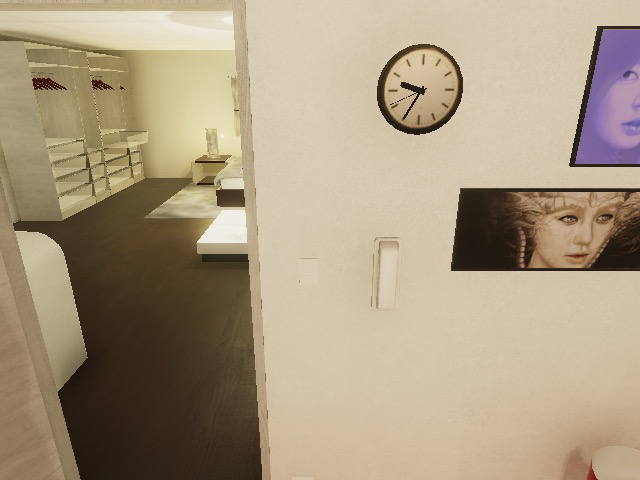 | **Human**: Give a detailed explanation of the image, describe the scene and the observed objects, and spatial relationships. Where should I go if I wish to find a coat hanger?<br><br>**EmbodiedGPT**:<br>1. The image depicts a doorway leading into a bedroom, with a clock hanging on the wall beside it and a picture of a woman further to the right.<br>2. There is a white closet suitable for storing clothes on the right side of the bedroom.<br>3. If one <font color="royalblue">needs to hang a coat, the white closet on the left</font> seem to be the logical choice.<br><br>**Visual ChatGPT**:<br>The image shows a bathroom with a clock on the wall and a toilet in the comer. The clock is white and has a black face with two hands owalls are tiled and there is a window in the room.<br>The image shows a bathroom with a clock and a toilet. <font color="orange">There is no coat hanger visible in the image</font>.
图3: EmbodiedGPT 和 VisualGPT 在问答任务中的比较。
<!-- Figure 3: Comparison between EmbodiedGPT and VisualGPT in the question-answering task. -->

<!-- **Evaluation on video input embodied AI tasks**. We evaluate the recognition ability of videos and planning abilities of our model for embodied control tasks on standard embodied AI benchmarks, Franka Kitchen [14] and Meta-World [15]. Meta-World provides a challenging set of tasks that require complex object manipulation skills, including assembling a ring on a peg, picking and placing a block between bins, pushing a button, opening a drawer, and hammering a nail. Franka Kitchen benchmark focuses on tasks like sliding open the right door, opening the cabinet, turning on the light, turning the stovetop knob, and opening the microwave. As shown in Figure 4, given a demonstration video, EmbodiedGPT can accurately interpret the embodied control task and provide step-by-step planning. The output planning is fed into the Embodied-former module of EmbodiedGPT to query highly relevant features for use as inputs in the policy network and the low-level actions are generated by the policy network to interact with the environment (see more visualizations in Appendix B). -->
**视频输入具身 AI 任务的评估**。我们在标准的具身 AI 基准(Franka Kitchen [14] 和 Meta-World [15])上, 评估了视频的识别能力, 以及模型对具身控制任务的规划能力。Meta-World 提供了一系列具有挑战性的任务, 这些任务需要复杂的对象操作技能, 包括在铁砧上组装戒指、在箱子之间拾取和放置块、按下按钮、打开抽屉和锤打钉子。Franka Kitchen 基准测试聚焦于滑动打开右侧门、打开橱柜、打开灯、转动炉灶旋钮和打开微波炉等任务。如[图4](#fig.4)所示, 给定一个演示视频, EmbodiedGPT 可以准确解释具身控制任务并提供分步规划。输出规划被喂给 EmbodiedGPT 的 Embodied-former 模块, 以查询高度相关的特征, 用作策略网络中的输入, 并且策略网络生成下层动作, 以与环境交互(请参阅附录 B 中的更多可视化效果)。

<span id='fig.4'></span>
| object | content
| :- | :-
| Video: | 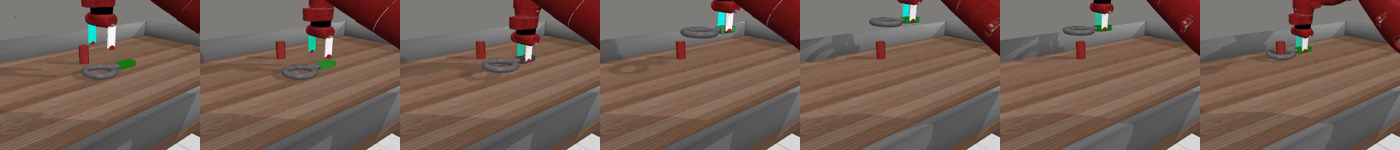
| 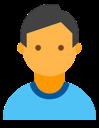 | Human: describe this video in detail
| 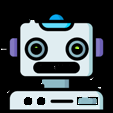 | Assistant:<br>The video displays a red robotic arm, a red cylinder, and a ring. The cylinder is positioned on a flat surface, and the ring is positioned next to it, with their centers aligned. The robotic arm is then used to pick up the ring.<br>Carefully, the center of the ring is aligned with the center of the cylinder, and the ring is slowly lowered onto the cylinder, joining the two together. The final step is to inspect the join using the robotic arm, ensuring that it is secure and without gaps.
| 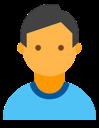 | Human: can you write a detailed plan for the task the robot is performing?
| 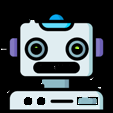| Assistant:<br>1. <font color="blue">Position</font> the first object, <font color="blue">a cylinder</font>, on a flat surface.<br>2. <font color="blue">Position</font> the second object, <font color="blue">a ring</font>, next to the red cylinder, with their centers aligned.<br>3. Use the robotic arm to <font color="blue">pick up the ring</font>.<br>4. Carefully <font color="blue">align the center</font> of the ring with the center of the cylinder.<br>5. Slowly <font color="blue">lower the ring onto the cylinder</font>, joining the two objects together.

<!-- Figure 4: Example of video input embodied AI tasks on Meta-World benchmark. EmbodiedGPT accurately analyzes embodied control tasks in demonstration videos and provides precise planning. -->
图4: Meta-World 基准上的视频输入具身 AI 任务示例。EmbodiedGPT 准确地分析了演示视频中具身控制任务, 并提供了精确的规划。

<!-- **Evaluation on embodied control tasks**. For embodied control tasks, we compare our model with R3M[12], which is the state-of-the-art method in these two benchmarks, and an ablation version called 'BLIP-2[Ego4D]', which has the same structure and same amount of parameters as EmbodiedGPT, and is only fine-tuned on the video caption task using the Ego4D dataset without incorporating EgoCOT. In all experiments, the policy network is learned using few-shot learning on a small amount of demonstration data. There are two settings, one of which utilizes 10 demonstrations, and the other utilizes 25 demonstrations. We report the success rate in 100 random evaluations with only visual observations in 5 tasks per benchmark over 5 seeds and 2 different camera views for each setting, respectively. As shown in Figure 5 and Figure 6, EmbodiedGPT outperforms the baseline methods, demonstrating the effectiveness of learning with EgoCOT. -->
**具身控制任务的评估**。对于具身控制任务, 我们将我们的模型与 R3M[12] 进行比较, R3M 是这两个基准测试中最先进的方法, 一个消融版本, 称为"BLIP-2[Ego4D]", 它具有与 EmbodiedGPT 相同的结构和相同数量的参数, 并且仅使用 Ego4D 数据集在视频字幕任务上进行微调, 而没有包含 EgoCOT。在所有实验中, 在少量演示数据上使用少样本学习, 学习策略网络。有两种配置, 其中一种使用 10 次演示, 另一种使用 25 次演示。我们报告了 100 次随机评估的成功率, 每个基准测试的 5 项任务仅使用视觉观察, 每个设置使用 5 个 seeds 和 2 个不同的摄像机视角。如[图5](#fig.5)和[图6](#fig.6)所示, EmbodiedGPT 优于基线方法, 证明了使用 EgoCOT 学习的有效性。

<!-- **Ablation study**. We perform ablation studies to analyze the effectiveness of the "Chain-of-Thought" training mode and the importance of a closed-loop design for embodied control. The results, as shown in Table 2, demonstrate a significant improvement in success rate when using the EgoCOT approach compared to training solely with the EGO4D caption task. Moreover, the closed-loop design is necessary as the generated plans contained specific and relevant sub-goal information, which proved crucial for control tasks. In summary, EmbodiedGPT exhibits a strong ability to generate reasonable planning, accurately extract task-relevant features from visual inputs, as well as execute low-level actions to interact with the environment. The ablation experiments demonstrate that both the training paradigm based on EgoCOT and the closed-loop design from embodied planning to low-level control significantly contribute to the performance improvement of EmbodiedGPT. -->
**消融研究**。我们进行消融研究, 以分析"思想链"训练模式的有效性, 以及闭环设计对具身控制的重要性。结果, 如[表2](#table.2)所示, 表明与仅使用 EGO4D 字幕任务进行训练相比, 使用 EgoCOT 方法的成功率显着提高。此外, 闭环设计是必要的, 因为生成的规划包含专用的相关子目标信息, 这对于控制任务是至关重要。综上所述, EmbodiedGPT 表现出强大的能力, 能够生成合理的规划、从视觉输入中准确地提取与任务相关的特征, 以及执行下层操作以与环境交互。消融实验表明, 基于 EgoCOT 的训练范式和(从具身规划到下层控制的)闭环设计都对 EmbodiedGPT 的性能提升做出了显着贡献。

<!-- Table 2: Ablation on the closed-loop spans from planning to low-level control, and "chain-of-thought" (COT) training with 25 and 10 demonstrations("-" symbol indicates "removing"). We report the average success rate over 5 tasks and 2 camera views per benchmark. -->
表2: <span id='table.2'></span> 从规划到下层控制的闭环范围内的消融, 以及使用 25 次和 10 次演示的"思路链"（COT）训练("-"符号表示"移除")。我们报告了每个基准测试中 5 个任务和 2 个摄像机视角的平均成功率。
Model | Franka(10 demos) | Franka(25 demos) | Meta-World(10 demos) | Meta-World(25 demos)
| :- | :-: | :-: | :-: | :-: |
| EmbodiedGPT | **50.8**% ±2.8 | **58.5**% ±2.7 | **76.4**% ±2.2 | **81.2**%±2.0
| \- Close-loop | 38.6% ±2.9 | 47.3% ±2.5 | 62.7% ±2.2 | 64.9% ±2.0
| \- COT | 26.2% ±3.2 | 36.4% ±2.7 | 55.2% ±2.4 | 58.7% ±2.0

<!-- **Real robot experiment**. We also conducted a real-world experiment using the Franka Emika robot arm, emphasizing a rearrangement task where the objective was to pack scattered bottles from a table into a box. As depicted in Figures 7 and 8, model is capable of generating intricate plans and executing of low-level actions based on 50 demonstration. -->
**真实机器人实验**。我们还使用 Franka Emika 机械臂进行了真实世界的实验, 重点是重新排列任务, 目标是将桌子上散落的瓶子装进盒子里。如[图7](#fig.7)和[图8](#fig.8)所示, 模型能够根据 50 个演示, 生成复杂的规划, 并执行下层动作。

<span id='fig.7'></span>
| image | text
| :-: | :-
| 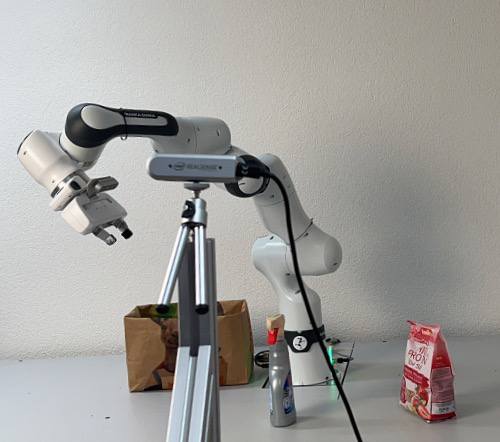<br>Franka Emika Panda arm with front facing camera | Human:<br>You are the controller of the robot shown in this image, now your task is put all the objects into the brown bag next to the robot, please write a step by step plan:<br><br>EmbodiedGPT:<br>Step 1. Move the robotic arm to the top of the gray bottle.<br>Step 2. Close the gripper and grasp the gray bottle.<br>Step 3. Move the arm to the brown bag.<br>Step 4. Release the bottle.<br>Step 5. Move the arm to the top of the cereal bag.<br>Step 6. Close the gripper and grasp the cereal bag.<br>Step 7. Move the arm to the brown bag.<br>Step 8. Finally, release the cereal bag.<br>

<!-- Figure 7: Generated plan by EmbodiedGPT for rearrangement task. -->
图7: EmbodiedGPT 为重排任务生成的规划。

# Conclusion
<!-- In this paper, we present EmbodiedGPT, an end-to-end multi-modal foundational model for embodied AI that enables agents to perform step-by-step planning and execute low-level commands. To achieve this, we create a large-scale embodied planning dataset called EgoCOT and develop an efficient training approach that utilizes prefix tuning to generate high-quality plans with a "chain-of-thought". Furthermore, our embodied control paradigm seamlessly coordinates high-level planning and low-level control. Extensive experiments demonstrate the effectiveness of EmbodiedGPT on various embodied tasks, achieving state-of-the-art or comparable performance. We believe that EmbodiedGPT represents a significant step towards developing more intelligent embodied AI agents. -->
在本文中, 我们介绍了 EmbodiedGPT, 一种端到端多模态具身 AI 基础模型, 使智能体能够执行分步规划和下层命令。为了实现这一目标, 我们创建了一个名为 EgoCOT 的大规模具身规划数据集, 并开发了一种高效的训练方法, 利用前缀调整生成具有"思路链"的高质量规划。此外, 我们的具身控制范式无缝协调上层规划和下层控制。大量实验证明了 EmbodiedGPT 在各种具身任务上的有效性, 实现了最先进或可比的性能。我们相信 EmbodiedGPT 代表(朝着开发更智能的具身 AI 智能体迈出的)重要一步。

<!-- **Future works and limitations**: EmbodiedGPT freezes the parameters of the vision and language model due to limited computational resources. Joint training with all modules and exploring other modalities, such as speech, could be future works. We do not foresee obvious undesirable ethical or social impacts at this moment. -->
**未来的工作和局限性**: 由于有限的计算资源, EmbodiedGPT 冻结视觉和语言模型的参数。与所有模块进行联合训练并探索语音等其他模态可能是未来的工作。目前, 我们预计不会出现明显的不良道德或社会影响。

# 实践
1. Clone this repository:
    - git clone https://github.com/EmbodiedGPT/EmbodiedGPT_Pytorch
    
    - cd EmbodiedGPT_Pytorch
2. Create a conda virtual environment:
    - conda create -n robohusky python=3.9.16 -y
    
    - conda activate robohusky
    
    - conda install pytorch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 pytorch-cuda=11.8 -c pytorch -c nvidia
3. Install flash-attn:
    - git clone https://github.com/Dao-AILab/flash-attention.git
    
    - cd flash-attention
    - conda install packaging -n robohusky
    - pip install flash-attn --no-build-isolation
    
    - cd ../..
5. ~~Install apex (optional):~~
    - ~~git clone https://github.com/NVIDIA/apex.git~~
    - ~~git checkout 2386a912164b0c5cfcd8be7a2b890fbac5607c82  # https://github.com/NVIDIA/apex/issues/1735~~
    - ~~pip install -v --disable-pip-version-check --no-cache-dir --no-build-isolation --config-settings "--build-option=--cpp_ext" --config-settings "--build-option=--cuda_ext" ./~~
6. Install other requirements:
    - pip install -e EmbodiedGPT_Pytorch
    - cd EmbodiedGPT_Pytorch
7. Supplement
    - pip uninstall huggingface-hub
    - pip uninstall transformers
    - pip uninstall tokenizers
    - conda install conda-forge::tokenizers=0.14.1 -n robohusky
    - \# https://huggingface.co/docs/huggingface_hub/installation#install-with-conda<br>
    conda install -c conda-forge huggingface_hub -n robohusky

    - \# https://huggingface.co/docs/transformers/installation#install-with-conda<br>
    conda install conda-forge::transformers=4.34.1 -n robohusky

    - \# https://huggingface.co/docs/peft/install<br>
    pip install peft

    - ~~conda install pyyaml~~

    - ~~# https://huggingface.co/docs/safetensors/index#installation~~<br>
    ~~conda install -c huggingface safetensors~~
    
    - \# https://github.com/dmlc/decord<br>
    pip install decord
7. Download    
    - [X] EgoCOT dataset [base version](https://drive.google.com/drive/folders/1d30x7S5MTz85JuqJcacQpp97T6Z2nbMt)
    - [ ] EgoCOT dataset [full version](https://huggingface.co/datasets/wofmanaf/ego4d-video)
        - git lfs install # 验证安装是否成功
        - git clone https://huggingface.co/datasets/wofmanaf/ego4d-video
    - [X] [COCO-2017 dataset](https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset)
    - [X] Pretrained Model [Embodied_family_7btiny](https://huggingface.co/Liang-ZX/Embodied_family_7b/tree/main)
        - sudo apt-get install git-lfs # 安装git-lfs
        - git lfs install # 验证安装是否成功
        - git clone https://huggingface.co/Liang-ZX/Embodied_family_7b

In [ ]:
# 连接服务器
ssh chengfangzheng@10.18.13.38
qiji@2021!

# 进入docker
sudo docker exec -ti chengfangzheng-dev /bin/bash

# 切换 conda 虚拟环境
conda activate robohusky

cd chengfangzheng/robot/EmbodiedGPT_Pytorch/
python demo/test.py



[VScode SSH远程登陆到服务器阅读代码](https://blog.csdn.net/tanxjian/article/details/128841510)



# 进入容器
docker exec -ti chengfangzheng-dev /bin/bash
# 查看是否在运行
docker ps | grep "chengfangzheng-dev"
# 退出容器
exit